
# K-Means Clustering for Customer Segmentation
### This notebook demonstrates using the K-Means algorithm 
### to group customers into meaningful clusters based on demographic 
### and financial features.

# Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans 
%matplotlib inline

# ================================================================
### Load and Explore the Dataset
# ================================================================

### Read the customer data CSV file
### The dataset contains customer demographic info, income, debts, and default history.

In [2]:
df=pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
Cust_Segmentation=df.drop(['Address'],axis=1)
Cust_Segmentation.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


# StandardScaler

In [4]:
from sklearn.preprocessing import StandardScaler
X=Cust_Segmentation.values[:,1:]
X=np.nan_to_num(X)
scaler = StandardScaler().fit(X)
clsc_data=scaler.transform(X)

In [5]:
num_clusters=4
k_means = KMeans(n_clusters=num_clusters, random_state=0, n_init=12)
k_means = k_means.fit(clsc_data)
labels=k_means.labels_
print(labels)

[2 1 0 2 3 1 2 2 2 1 0 2 2 1 0 2 2 2 1 1 2 2 0 1 3 1 2 1 2 2 1 1 0 2 2 2 0
 0 2 1 0 1 2 1 1 1 2 2 2 2 1 1 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 0 2 0 2 2 1 2
 2 2 2 2 3 1 1 3 1 2 1 2 2 2 0 0 1 2 0 0 2 2 2 2 0 2 0 3 1 0 0 1 2 2 2 1 1
 2 2 0 2 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 0 0 2 2 2 3 2 1 0
 2 2 2 1 0 2 2 1 1 1 0 0 2 1 1 2 2 2 2 2 2 2 1 2 2 0 2 0 1 2 0 1 0 2 2 3 0
 0 2 2 1 2 2 1 1 0 1 2 2 1 3 2 1 2 0 2 2 0 2 1 1 0 2 2 2 1 2 0 0 3 1 1 0 1
 2 2 2 2 3 2 2 1 2 1 1 2 1 2 1 0 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 0 1 0 2
 2 2 2 1 0 1 0 2 1 2 2 0 2 2 1 2 0 0 0 2 2 2 3 1 2 1 2 1 2 1 1 2 2 2 0 2 2
 0 2 0 1 1 1 2 2 0 2 1 0 0 2 2 2 2 2 1 2 2 0 2 0 3 2 0 2 2 2 0 0 1 1 1 1 0
 2 2 0 2 1 2 1 1 1 2 0 1 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 1 0 2 0 1 2 1 1 1 1
 0 2 1 0 0 2 2 1 0 2 2 2 2 2 3 2 1 2 2 2 2 0 2 0 2 2 2 1 2 2 2 2 0 2 2 0 0
 1 2 2 2 1 2 0 0 1 1 0 1 2 1 0 2 2 3 1 2 0 2 2 1 1 0 2 3 2 2 2 1 1 2 2 2 3
 1 0 2 2 1 2 3 0 2 2 3 2 0 2 2 1 2 3 2 2 2 2 1 2 2 0 1 2 1 1 1 0 1 2 2 0 2
 0 2 2 2 2 1 1 0 0 2 1 2 

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [6]:
Cust_Segmentation['clus_label']=labels
Cust_Segmentation.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_label
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3


In [7]:
Cust_Segmentation.groupby('clus_label').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_label,,,,,,,,,
0,424.442424,31.812121,1.878788,3.933333,31.442424,1.597758,2.793218,0.987805,14.041818
1,402.086758,41.634703,1.598174,15.954338,72.196347,1.953635,4.280562,0.011765,9.835616
2,435.644706,32.115294,1.647059,5.752941,30.903529,0.743233,1.617158,0.000000,7.938824
3,449.658537,42.902439,2.292683,16.902439,135.146341,8.120659,12.959537,0.593750,19.536585


# Elbow methode

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

Optimal Elbow Point found at k = 4


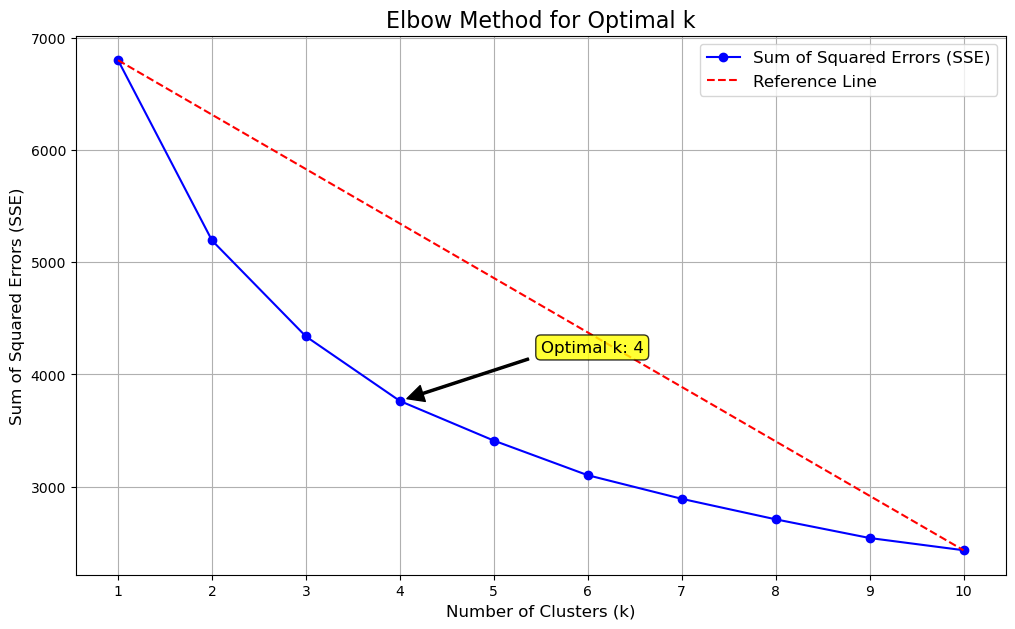

In [8]:
# ================================
# Section 1: Calculate SSE for Different Values of k
# ================================
# We test k values from 1 to 10 to observe how the sum of squared errors (SSE) changes.
sse = []
k_range = range(1, 11)

# Run KMeans clustering for each k value, record SSE (inertia)
for k in k_range:
    # n_init=10 runs the algorithm with 10 different random initializations to select the best outcome
    k_means = KMeans(n_clusters=k, random_state=42, n_init=10)
    k_means.fit(clsc_data)
    sse.append(k_means.inertia_) # .inertia_ provides the SSE for each model

# ================================
# Section 2: Find the Elbow Point (Optimal k)
# ================================
# This function calculates the perpendicular distance of each point from the line connecting the first and last points.
# The k with the largest distance is identified as the "elbow"—the optimal number of clusters.
def find_elbow_point(sse_values, k_range_values):
    # Coordinates for first and last points
    p1 = np.array([k_range_values[0], sse_values[0]])
    p2 = np.array([k_range_values[-1], sse_values[-1]])
    
    # Calculate distance from each SSE point to the reference line
    distances = []
    for i in range(len(sse_values)):
        p3 = np.array([k_range_values[i], sse_values[i]])
        distance = np.abs(np.cross(p2 - p1, p1 - p3)) / np.linalg.norm(p2 - p1)
        distances.append(distance)
        
    # Identify the point with the maximum distance (elbow point)
    elbow_index = np.argmax(distances)
    elbow_point_k = k_range_values[elbow_index]
    
    return elbow_point_k

# Find the optimal k using the geometric elbow method
optimal_k = find_elbow_point(sse, list(k_range))

print(f"Optimal Elbow Point found at k = {optimal_k}")

# ================================
# Section 3: Visualization
# ================================
plt.figure(figsize=(12, 7))

# Plot SSE results for all k
plt.plot(k_range, sse, marker='o', linestyle='-', color='b', label='Sum of Squared Errors (SSE)')

# Plot the reference line between the first and last points
plt.plot([k_range[0], k_range[-1]], [sse[0], sse[-1]], linestyle='--', color='r', label='Reference Line')

# Set titles and labels for clear presentation
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.legend(fontsize=12)

# Annotate the detected elbow point on the plot for emphasis
plt.annotate(
    f'Optimal k: {optimal_k}',
    xy=(optimal_k, sse[optimal_k - 1]),
    xytext=(optimal_k + 1.5, sse[optimal_k - 1] + (sse[0] - sse[-1]) * 0.1),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1, alpha=0.8)
)

# Display the plot
plt.show()


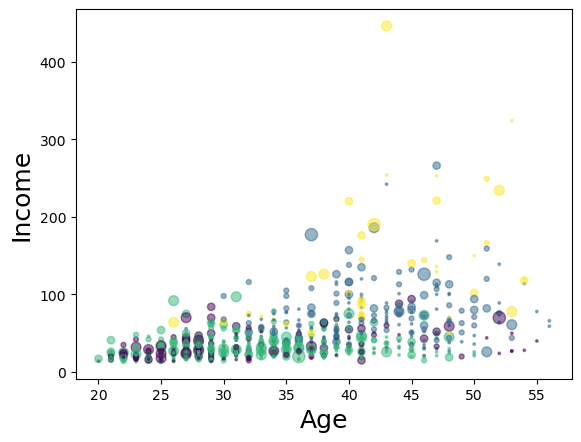

In [15]:
# =============================================
# Scatter Plot: Visualizing Customer Segments
# =============================================

# Calculate marker areas based on education level
# Each point's area is proportional to the square of the 'Edu' feature (education),
# scaled by pi to enhance visual differentiation
area = np.pi * (Cust_Segmentation['Edu']) ** 2

# Scatter plot: age (X[:,0]) vs income (X[:,3])
# Marker size reflects education level, color represents cluster labels
plt.scatter(
    x=X[:, 0],           # x-axis is 'age'
    y=X[:, 3],           # y-axis is 'Income'
    s=area,              # marker size by education
    c=labels,            # color by cluster label
    alpha=0.5            # semi-transparent points for better readability
)

# Label axes for clarity
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)

# Display the plot
plt.show()


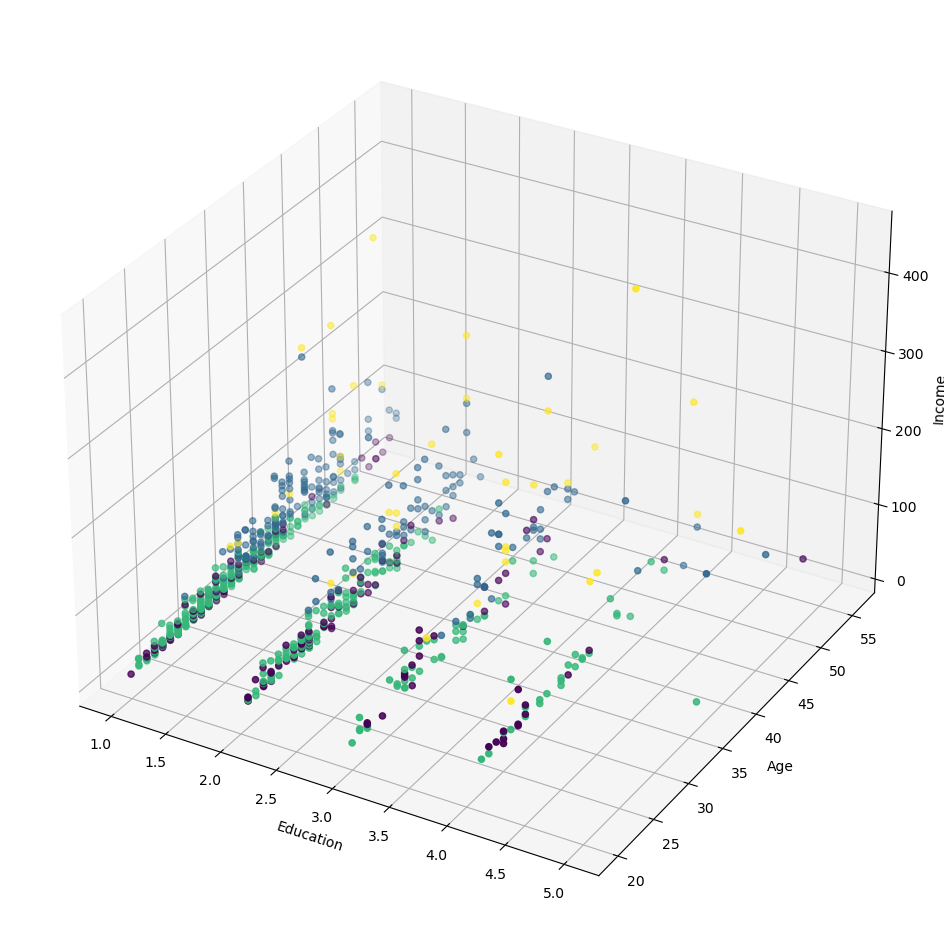

In [16]:
# ========================================
# 3D Scatter Plot: Customer Segmentation
# ========================================

# Create a new figure for the 3D plot with a specified size
fig = plt.figure(figsize=(12, 12))

# Add a 3D subplot to the figure
ax = fig.add_subplot(projection='3d')

# Clear any existing plot (optional; typically not required in new figures)
plt.cla()

# Create a 3D scatter plot:
#   - X-axis: Education (X[:, 1])
#   - Y-axis: Age (X[:, 0])
#   - Z-axis: Income (X[:, 3])
#   - Color: Cluster labels (labels)
ax.scatter(
    X[:, 1],         # Education on x-axis
    X[:, 0],         # Age on y-axis
    X[:, 3],         # Income on z-axis
    c=labels         # Color each point by its cluster label
)

# Set axes labels with clear descriptions
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# Display the 3D plot
plt.show()


In [17]:
import plotly.express as px

# ===========================================
# Interactive 3D Scatter Plot: Customer Segmentation
# ===========================================

# Create a 3D scatter plot using Plotly Express:
#    - x-axis: Education ('Edu')
#    - y-axis: Age ('Age')
#    - z-axis: Income ('Income')
#    - Color: Cluster label (labels)
fig = px.scatter_3d(
    df,
    x='Edu',        # Education on x-axis
    y='Age',        # Age on y-axis
    z='Income',     # Income on z-axis
    color=labels    # Color points by cluster assignment
)

# Update marker size for visual clarity (small points)
fig.update_traces(marker=dict(size=2))

# Display the interactive plot
fig.show()


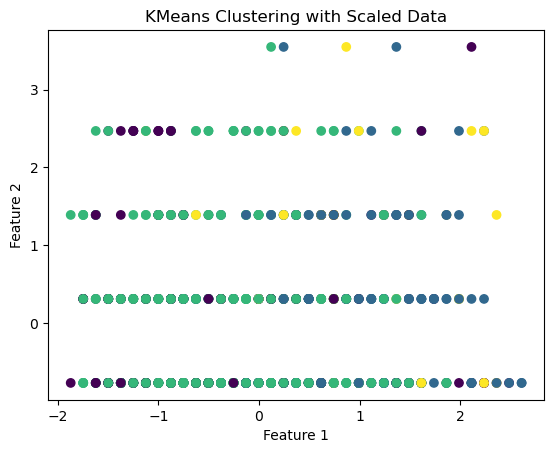

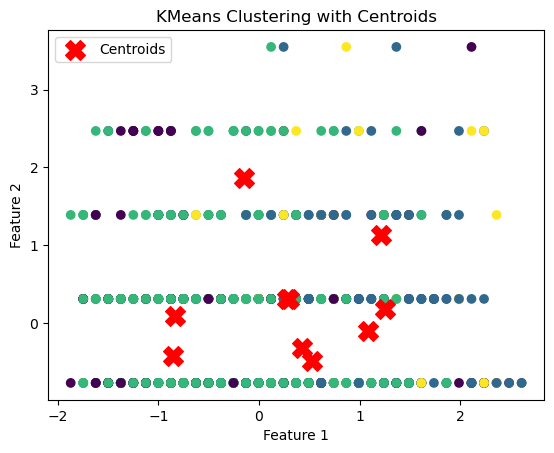

In [18]:
# ===========================================
# Visualizing KMeans Clusters with Matplotlib
# ===========================================

# Scatter plot of the clustered data
# - Each point colored by its assigned cluster label
plt.scatter(
    clsc_data[:, 0],      # x-axis: Feature 1
    clsc_data[:, 1],      # y-axis: Feature 2
    c=labels,             # Color by cluster label
    cmap='viridis'        # 'viridis' colormap for visually distinct clusters
)
plt.title("KMeans Clustering with Scaled Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ===========================================
# Adding Cluster Centroids to the Plot
# ===========================================

# Retrieve cluster centers from trained KMeans model
centers = k_means.cluster_centers_

# Scatter plot of data points colored by cluster
plt.scatter(
    clsc_data[:, 0], clsc_data[:, 1],
    c=labels, cmap='viridis'
)

# Overlay cluster centroids as large red 'X' markers
plt.scatter(
    centers[:, 0], centers[:, 1], 
    c='red', s=200, marker='X',    # Centroid markers: color red, size 200, marker shape 'X'
    label='Centroids'
)
plt.title('KMeans Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## metrics

In [19]:
from sklearn.metrics import silhouette_score

# ============================================
# Evaluating Clustering Quality: Silhouette Score
# ============================================
# Silhouette Score measures how well each data point fits within its assigned cluster
# compared to other clusters.
# Value ranges from -1 (incorrect clustering) to +1 (well-separated clusters);
# values near 0 indicate overlapping clusters.

score = silhouette_score(clsc_data, labels)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.2535354226215302
